### Import the libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Time Series Libraries

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima  # AIC
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [17]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col=['Month'])
#                  ,,parse_dates=['Month'])
print(type(df)) 
df.head() 

<class 'pandas.core.frame.DataFrame'>


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [18]:
df.dtypes

#Passengers    int64
dtype: object

In [20]:
df.shape
# rows= 144, cols = 1

(144, 1)

In [22]:
print(df.index.min())
print(df.index.max())

1949-01-01 00:00:00
1960-12-01 00:00:00


#### Inference
1) Air Passengers data is present from  1Jan-1949 to 1Dec-1960.<br>
2) Air Passengers data is present on a monthly basis.

#### Handle Null Values

In [23]:
df.isnull().sum()

#Passengers    0
dtype: int64

#### Handle duplicates

In [26]:
df.duplicated(['#Passengers']).sum()

26

#### Inference
Duplicate values in Data points alone should NOT be removed.

In [28]:
df.index.duplicated().sum()
# Date values have no duplicates

0

In [29]:
print(df.index.min())
print(df.index.max())

1949-01-01 00:00:00
1960-12-01 00:00:00


In [33]:
d1 = pd.date_range(start='1949-01-01',end='1960-12-01',freq='MS')  # MS = Month Start
d1

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [35]:
d2 = pd.date_range(start='1949-01-01',end='1949-12-01',freq='D')  # D = Day
d2

DatetimeIndex(['1949-01-01', '1949-01-02', '1949-01-03', '1949-01-04',
               '1949-01-05', '1949-01-06', '1949-01-07', '1949-01-08',
               '1949-01-09', '1949-01-10',
               ...
               '1949-11-22', '1949-11-23', '1949-11-24', '1949-11-25',
               '1949-11-26', '1949-11-27', '1949-11-28', '1949-11-29',
               '1949-11-30', '1949-12-01'],
              dtype='datetime64[ns]', length=335, freq='D')

In [ ]:
# freq = 'MS', 'YS', "QS"

In [31]:
res = df.index == d1
print(res)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


#### Time Series data
1)Univariate - Date wise Sales => Target variable => Sales, independent feature = Date

2) Multivaraite - Date, Sales, Prod, Discount etc <br>
Target variable => Sales, Independent feature = Date, Prod, Discount


In [ ]:
#### 
# Date   Sales
# Jan    780
# Feb    815
# Mar    820
# Apr    805
# May    834
# Jun     ?

#### Properties of Time Series data

1) Data should be autocorrelated.(present value is dependent on its past values)<br>
2) There should be no null values.<br>
3) Data should be sequentially indexed with time. Data should be present in dataframe such that date column is set as index and the data values should be present as single column(for Univariate analysis)<br>
4) Date value should be arranged in acsending order.<br>


### Components of Time Series data

#### Trend 
Overall if data values increases with time(Uptrend) and if data values decreaes with time(downtrend)


#### Seasonality 
Periodic fluctuations in the data values.

#### Noise / Irregular components/ Residual
Irregular components are those components of time series data which cant be explained by trend and or seasonality. They dont follow any pattern.



#### Stationary data
<pre>
Stationary Time Series data implies
1) Constant Mean
2) Constant Variance
3) Minimal Trend and/or seasonality
</pre>

#### Test for Stationarity - ADF Test (Hypothesis test)
<pre>
ADF Test - Augmented Dickey Fuller Test
Ho : Data is not stationary
H1 : Data is stationary    

ADF Test returns test_stat value and p-val:
alpha = 0.05 (significance level)
a) pval>0.05 => Ho is accepted (Data is not Stationary)
b) pval<=0.05 => H1 is accepted (Data is Stationary)
</pre>


#### Methods to make data Stationary
<pre>
1) Differencing
2) Log
3) Sqr, Sqrt
4) Log Differencing
etc
</pre>

In [36]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


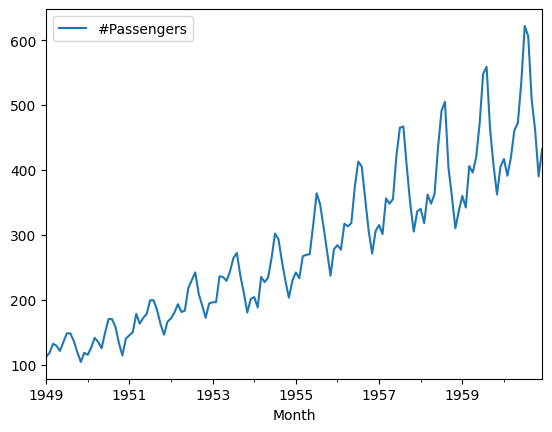

In [37]:
df.plot()
plt.show()

### Decomposing Time Series Data

Additive Decomposition<br>
Yt = Trend + Seasonality + Noise <br>

Multiplicative Decomposition<br>
Yt = Trend * Seasonality * Noise<br>

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

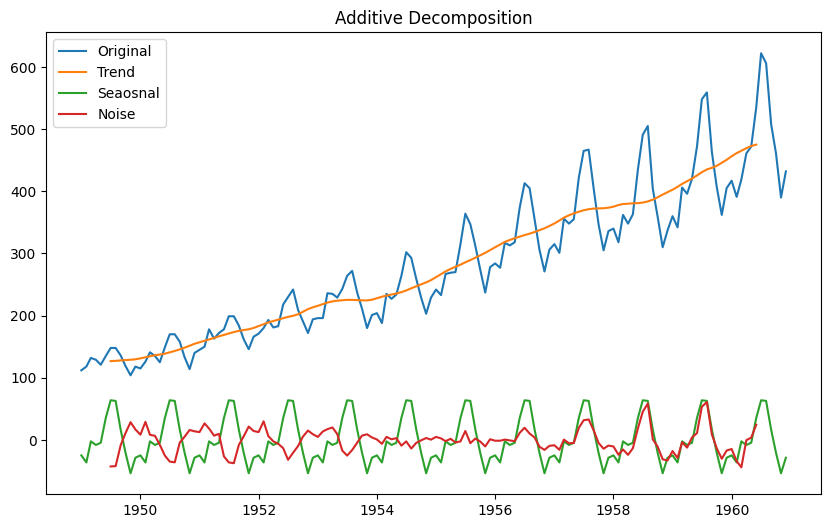

In [45]:
decom = seasonal_decompose(df, model='additive')

original = decom.observed
trend = decom.trend
seasonal = decom.seasonal
noise = decom.resid

plt.figure(figsize=(10,6))
plt.plot(original,label='Original')
plt.plot(trend,label='Trend')
plt.plot(seasonal,label='Seaosnal')
plt.plot(noise,label='Noise')
plt.title('Additive Decomposition')
plt.legend()
plt.show()

#### Infernence

Data Contains trend and seasonal patterns

#### ADF Test - test for Stationary

In [46]:
from statsmodels.tsa.stattools import adfuller

In [55]:
def adf_test(data):
    res = adfuller(data)
    print('Test_stat',res[0])
    print('p-val',res[1])
    alpha = 0.05
    if res[1]>alpha:
        print('Ho is accepted : Data is not stationary')
    else:
        print('H1 is accepted : Data is stationary')
#     print(res)

In [56]:
adf_test(df)

Test_stat 0.8153688792060482
p-val 0.991880243437641
Ho is accepted : Data is not stationary


In [57]:
adf_test(np.log(df))

Test_stat -1.7170170891069607
p-val 0.42236677477039125
Ho is accepted : Data is not stationary


In [58]:
adf_test(np.sqrt(df))

Test_stat -0.34585376771567355
p-val 0.918754321761837
Ho is accepted : Data is not stationary


In [59]:
adf_test(np.cbrt(df))

Test_stat -0.810035072218635
p-val 0.8161565539700508
Ho is accepted : Data is not stationary


In [60]:
adf_test(df.diff(1).dropna())

Test_stat -2.8292668241699994
p-val 0.0542132902838255
Ho is accepted : Data is not stationary


In [61]:
adf_test(df.diff(2).dropna())

Test_stat -2.9616951355554244
p-val 0.03862975767698839
H1 is accepted : Data is stationary


In [73]:
adf_test(np.log(df).diff(2).dropna())

Test_stat -3.167907375288738
p-val 0.021919114564039218
H1 is accepted : Data is stationary


In [74]:
adf_test(df.diff().diff().dropna())

Test_stat -16.384231542468505
p-val 2.7328918500142407e-29
H1 is accepted : Data is stationary


In [62]:
df1 = df.copy()

In [65]:
df1.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [70]:
df1['Lag1']  = df1['#Passengers'].shift(1)
df1['Lag2']  = df1['#Passengers'].shift(2)
df1['Diff1']  = df1['#Passengers'].diff(1)  # #Passengers - Lag1
df1['Diff2']  = df1['#Passengers'].diff(2)  # #Passengers - Lag2
df1.head()

,#Passengers,Lag1,Lag2,Diff1,Diff2
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,6.0,NaN
1949-03-01,132,118.0,112.0,14.0,20.0
1949-04-01,129,132.0,118.0,-3.0,11.0
1949-05-01,121,129.0,132.0,-8.0,-11.0


#### Split data into train and test

In [75]:
df.shape

(144, 1)

In [76]:
train = df.iloc[:114]
test = df.iloc[114:]
print(train.shape)
print(test.shape)

(114, 1)
(30, 1)


In [78]:
print(train.tail(2))
print(test.head(2))

            #Passengers
Month                  
1958-05-01          363
1958-06-01          435
            #Passengers
Month                  
1958-07-01          491
1958-08-01          505


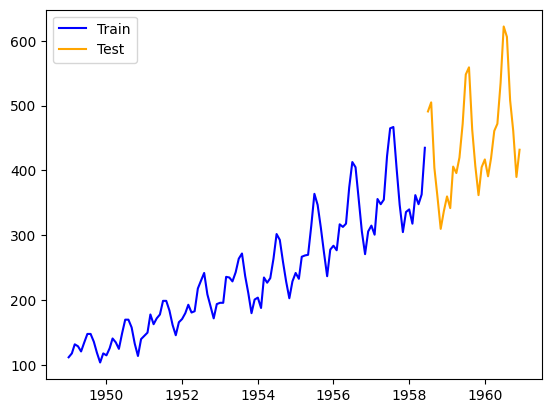

In [80]:
plt.plot(train,color='blue',label='Train')
plt.plot(test,color='orange',label='Test')
plt.legend
plt.legend()
plt.show()

### ARIMA - Auto Regreesive Integrated Moving Average
AR(Auto Regressive), I(Integrated) and MA(Moving Average)

p - Can be obtained from PACF(Partial Auto Correlation Function) plot<br>
d - d is the order of differencing (i.e. d=2)<br>
q - Can be obtained from ACF(Auto Correlation Function) plot<br>

p is the order of the Auto Regressive (AR) term. It refers to the number of lags of Y to be used as predictors. And q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

I(d) Integration – It uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times. For a stationary time series, d=0.
 
q is the order of (MA model), where Yt depends only on the lagged forecast errors.
 
ARIMA model can be summarised as :
Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

In [81]:
# AR Model(p=4) => 
# Sales_Nov = c + m1*Sales_Oct + m2*Sales_Sep + m3*Sales_Aug + m4*Sales_July + et
# et is the error term (lagged forecast errors)

# MA Model(q=3)
# Sales_Nov = c + w1*et_Oct + w2*et_Sep + w3*et_Aug 

# ARMA Model (p=2,d=0,q=2)

# ARIMA Model (p,d,q)


# AR(p=1,d=0,q=0)
# MA(p=0,d=0,q=1)
# ARMA(p=1,d=0,q=1)
# ARIMA(p=1,d=1,q=1)



#### Craete Function to Evalaute model

In [83]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [86]:
def eval_model(ytest,ypred,mname):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    res = pd.DataFrame({'MAE':mae,'MSE':mse,'RMSE':rmse},index=[mname])
    return res

def plot_results(ypred):
    plt.plot(train,color='blue',label='Train')
    plt.plot(test,color='orange',label='Test')
    plt.plot(ypred,color='green',label='Fcast')
    plt.legend()
    plt.show()
    


#### ARIMA (p,d,q)

In [89]:
from statsmodels.tsa.arima.model import ARIMA

In [93]:
import warnings
warnings.filterwarnings('ignore')

### 1) AR(1,0,0)

In [94]:
ar1 = ARIMA(train,order=(1,0,0))
ar_m1 = ar1.fit()
ar_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -536.329
Date:                Sat, 14 Oct 2023   AIC                           1078.658
Time:                        11:42:46   BIC                           1086.867
Sample:                    01-01-1949   HQIC                          1081.989
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.9824     62.897      3.990      0.000     127.706     374.259
ar.L1          0.9708      0.026     37.853      0.000       0.921       1.021
sigma2       696.6931     94.142      7.400      0.000     512.179     881.207
===================================================================================
Ljung-Box (L1) (Q):                   6.75   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.01   Prob(JB):                         0.37
Heteroskedasticity (H):               5.91   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
test.shape

(30, 1)

In [96]:
fcast_ar1 = ar_m1.forecast(test.shape[0])
fcast_ar1

1958-07-01    429.630179
1958-08-01    424.417056
1958-09-01    419.356056
1958-10-01    414.442742
1958-11-01    409.672803
1958-12-01    405.042056
1959-01-01    400.546438
1959-02-01    396.182007
1959-03-01    391.944935
1959-04-01    387.831505
1959-05-01    383.838109
1959-06-01    379.961244
1959-07-01    376.197510
1959-08-01    372.543605
1959-09-01    368.996326
1959-10-01    365.552559
1959-11-01    362.209285
1959-12-01    358.963571
1960-01-01    355.812570
1960-02-01    352.753519
1960-03-01    349.783734
1960-04-01    346.900610
1960-05-01    344.101619
1960-06-01    341.384305
1960-07-01    338.746285
1960-08-01    336.185245
1960-09-01    333.698939
1960-10-01    331.285186
1960-11-01    328.941869
1960-12-01    326.666931
Freq: MS, Name: predicted_mean, dtype: float64

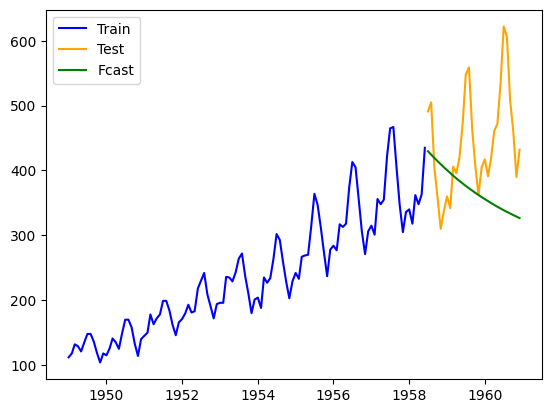

In [97]:
plot_results(fcast_ar1)

In [98]:
ar1_res = eval_model(test,fcast_ar1,'AR(1,0,0)')
ar1_res

,MAE,MSE,RMSE
"AR(1,0,0)",93.110466,13721.223716,117.137627


In [99]:
### MA(0,0,1)
### ARMA(1,0,1)
### ARIMA(1,1,1)

#### ARIMA(1,2,1)

In [100]:
arima1 = ARIMA(train,order=(1,2,1))
arima_m1 = arima1.fit()
arima_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -524.560
Date:                Sat, 14 Oct 2023   AIC                           1055.121
Time:                        11:46:56   BIC                           1063.276
Sample:                    01-01-1949   HQIC                          1058.430
                         - 06-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2609      0.101      2.590      0.010       0.063       0.458
ma.L1         -0.9995      2.925     -0.342      0.733      -6.732       4.733
sigma2       660.0951   1934.779      0.341      0.733   -3132.002    4452.192
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 3.10
Prob(Q):                              0.62   Prob(JB):                         0.21
Heteroskedasticity (H):               6.10   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [104]:
test.shape

(30, 1)

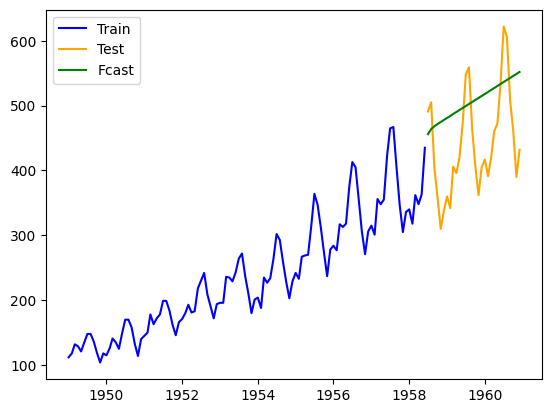

In [101]:
fcast_arima1 = arima_m1.forecast(test.shape[0])
plot_results(fcast_arima1)

In [102]:
arima1_res = eval_model(test,fcast_arima1,'ARIMA(1,2,1)')
arima1_res

,MAE,MSE,RMSE
"ARIMA(1,2,1)",87.174794,9355.503474,96.723852


In [103]:
ar1_res

,MAE,MSE,RMSE
"AR(1,0,0)",93.110466,13721.223716,117.137627


### Custom ARIMA

In [ ]:
p = [1,2,3,4,5]
d = [1,2]
q = [1,2,3,4,5]

rmse_list = []
pdq_list = []
for i in p:
    for j in d:
        for k in q:
            model = ARIMA(train,order=(i,j,k)).fit()
            fcast = model.forecast(test.shape[0])
            rmse = np.sqrt(mean_squared_error(test,fcast))
            rmse_list.append(rmse)
            pdq_list((i,j,k))

In [ ]:
print(min(rmse_list))
min_rmse_index = rmse_list.index(min(rmse_list))
print(min_rmse_index)
print(pdq_list[min_rmse_index]) # => 

In [ ]:
### Apply ARIMA (p,d,q) model from the p,d,q values obtained from above step